# YELPZIP - FAKE REVIEWS DETECTION MODEL

The dataset: YelpZip
Link: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset/discussion/156218


##  (1) Data Exploration

### Import libraries and the dataset from Google Drive

In [ ]:
import pandas as pd
import numpy as np
import json
import os

# library to clean data
import re

import string
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#colab mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Load directory
os.chdir("/content/gdrive/My Drive/Thesis B/Fake Review Model/YelpZip")
os.listdir()

['Labelled Yelp Dataset.csv',
 'userIdMapping',
 'productIdMapping',
 'reviewContent',
 'reviewGraph',
 'readmeYelp.txt',
 'metadata',
 'merged_data.csv',
 'features_dataset.csv',
 'test_reviews.csv',
 'test_profiles.txt',
 'test_labels.txt',
 'train_reviews.csv',
 'train_profiles.txt',
 'train_labels.txt',
 'all_profiles.txt',
 'profiles.txt',
 'labels.txt',
 'all_labels.txt',
 'YZ2_labels.txt',
 'YZ2_profiles.txt',
 'YZ3_labels.txt',
 'YZ3_profiles.txt',
 'YZ4_labels.txt',
 'YZ4_profiles.txt']

In [ ]:
col_metadata=['user_id', 'prod_id', 'rating', 'label', 'date']
metadata = pd.read_csv('metadata', sep='\t', names=col_metadata, header=None)
print(metadata.head())
#Class 1 = Not spam, -1 = spam
print(metadata.describe())

   user_id  prod_id  rating  label        date
0     5044        0     1.0     -1  2014-11-16
1     5045        0     1.0     -1  2014-09-08
2     5046        0     3.0     -1  2013-10-06
3     5047        0     5.0     -1  2014-11-30
4     5048        0     5.0     -1  2014-08-28
             user_id        prod_id         rating          label
count  608598.000000  608598.000000  608598.000000  608598.000000
mean    89642.634603    2564.991760       3.923595       0.735569
std     73873.157594    1447.929346       1.147472       0.677450
min      5044.000000       0.000000       1.000000      -1.000000
25%     25495.250000    1345.000000       3.000000       1.000000
50%     66770.000000    2616.000000       4.000000       1.000000
75%    142269.000000    3768.000000       5.000000       1.000000
max    265320.000000    5043.000000       5.000000       1.000000


In [ ]:
col_reviewContent=['user_id', 'prod_id', 'date', 'review']
reviewContent = pd.read_csv('reviewContent', sep='\t', names=col_reviewContent, header=None)
print(reviewContent.head())

   user_id  prod_id        date  \
0     5044        0  2014-11-16   
1     5045        0  2014-09-08   
2     5046        0  2013-10-06   
3     5047        0  2014-11-30   
4     5048        0  2014-08-28   

                                              review  
0  Drinks were bad, the hot chocolate was watered...  
1  This was the worst experience I've ever had a ...  
2  This is located on the site of the old Spruce ...  
3  I enjoyed coffee and breakfast twice at Toast ...  
4  I love Toast! The food choices are fantastic -...  


In [ ]:
col_productIdMapping=['prod_name', 'prod_id']
productIdMapping = pd.read_csv('productIdMapping', sep='\t', names=col_productIdMapping, header=None)
print(productIdMapping.head())

                         prod_name  prod_id
0                            Toast        0
1    Big Apple Lounge & Restaurant        1
2                       La Carreta        2
3                      Just Subs 6     2780
4  Formosa Asian Fusion Restaurant        4


In [ ]:
df = pd.merge(metadata, reviewContent, on=['user_id', 'prod_id', 'date']).merge(productIdMapping, on=['prod_id'])
df.head()

,user_id,prod_id,rating,label,date,review,prod_name
0,5044,0,1.0,-1,2014-11-16,"Drinks were bad, the hot chocolate was watered...",Toast
1,5045,0,1.0,-1,2014-09-08,This was the worst experience I've ever had a ...,Toast
2,5046,0,3.0,-1,2013-10-06,This is located on the site of the old Spruce ...,Toast
3,5047,0,5.0,-1,2014-11-30,I enjoyed coffee and breakfast twice at Toast ...,Toast
4,5048,0,5.0,-1,2014-08-28,I love Toast! The food choices are fantastic -...,Toast


In [ ]:
# Export to CSV
# df.to_csv('merged_data.csv')

### Examine the dataset

*   Check the data type and missing values
*   Count the number of 2 review classes ( 1 = Genuine review, -1 = Fake/Spam review)
* Check the relationship between reviews labelled as fake and numeric rating
* Create wordclouds for the first 50,000 fake and real reviews




In [ ]:
#Take a look at the first 20 real reviews:
pd.set_option('max_colwidth', 400)
df.loc[df['label'] == 1]['review'].head(20)

7       Extremely slow kitchen. I went with an hour to eat before my shift and told the server that information as well. I got canned fruit and an omelette over 45 minutes later. I boxed it and left. About 2 weeks later I was waiting for quick hem and asked for the fastest thing they could make, bagel and cream cheese was the answer. That took over 15 minutes. Don't come here with any time constraints.
8     I really wanted to love toast. It's quaint and cozy, and it was a perfect place to hop on a call while on my layover in Philadelphia. I figured I'd get a latte and some food while there. The latte was upwards of $4 for a small. I also ordered a turkey sausage grilled cheese, which I believe was around $10. We sat down and availed ourselves to the free wifi (great perk) while waiting for our fo...
9     First brunch experience here in Philly (actually in my entire life), and oh man, I can see why now brunch is such a thing. My friends and I initially planned on Green Eggs Café, but 

In [ ]:
#Take a look at the first 20 real reviews:
pd.set_option('max_colwidth', 400)
df.loc[df['label'] == -1]['review'].head(20)

0                                                                                                                                                                                                                          Drinks were bad, the hot chocolate was watered down and the latte had a burnt taste to it. The food was also poor quality, but the service was the worst part, their cashier was very rude.
1      This was the worst experience I've ever had a casual coffee/light fare place.  The server disappeared for 20 minutes, just talking to his friend by the window as my girlfriend and I sat dumbfounded that this dude had the nerve to do that on the job.  We're trying to make eye contact, but clearly getting paid to talk to his bud was more important to him. My girlfriend went up to the counter onc...
2                                                                                                                                                    This is located on the site of the ol

#### Check the datatype and missing values

In [ ]:
#Check datatype:
df.dtypes

user_id        int64
prod_id        int64
rating       float64
label          int64
date          object
review        object
prod_name     object
dtype: object

In [ ]:
#Count number of missing values:
print(" \nTotal NaN at each column: \n", df.isnull().sum())

 
Total NaN at each column: 
 user_id      0
prod_id      0
rating       0
label        0
date         0
review       0
prod_name    0
dtype: int64


#### Calculate numbers of reviews and reviewers

Number of reviews in the dataset:  608458
Number of fake and real reviews:
label
-1     80439
 1    528019
dtype: int64


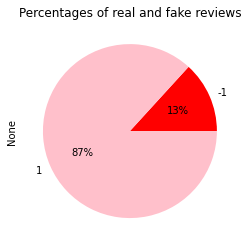

In [ ]:
#Number of reviews:
print("Number of reviews in the dataset: ", df['review'].count())

#Count the reviews of 2 classes (Genuine/Fake)
print('Number of fake and real reviews:')
print(df.groupby('label').size())

#Create pie chart
import matplotlib.pyplot as plt
df.groupby('label').size().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],
                                title='Percentages of real and fake reviews')

In [ ]:
print("Number of fake reviews with rating < 3: ", len(df[(df['label'] == -1) & (df['rating'] < 3)]))
print("Number of fake reviews with rating > 3: ",len(df[(df['label'] == -1) & (df['rating'] > 3)]))

Number of fake reviews with rating < 3:  17760
Number of fake reviews with rating > 3:  56344


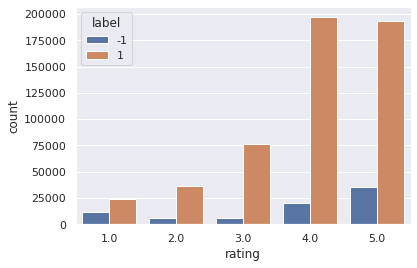

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="rating", hue="label", data=df)

Number of reviewers in the dataset:  260239
Number of fake review authors in the dataset:  62214
Number of real review authors in the dataset:  200146
Number of reviewers that write only genuine reviews in the dataset:  198025
Number of reviewers that write both fake and real reviews in the dataset:  2121


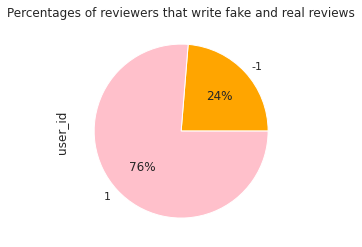

In [ ]:
#Number of reviewers:
print("Number of reviewers in the dataset: ", df['user_id'].nunique())

#Number of reviewers who wrote fake reviews:
print("Number of fake review authors in the dataset: ", df.query('label == -1')['user_id'].nunique())
print("Number of real review authors in the dataset: ", df.query('label == 1')['user_id'].nunique())
print("Number of reviewers that write only genuine reviews in the dataset: ", df['user_id'].nunique() - df.query('label == -1')['user_id'].nunique())
print("Number of reviewers that write both fake and real reviews in the dataset: ", df.query('label == 1')['user_id'].nunique() +
      df.query('label == -1')['user_id'].nunique() - 
      df['user_id'].nunique())

df.groupby(['label'])['user_id'].nunique().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['orange', 'pink', 'steelblue'],
                                title='Percentages of reviewers that write fake and real reviews')

In [ ]:
#Number of products that have real and fake reviews:
print("Number of products in the dataset: ", df['prod_id'].nunique())
print("Number of products with fake reviews in the dataset: ", df.query('label == -1')['prod_id'].nunique())
print("Number of products with only real reviews in the dataset: ", df['prod_id'].nunique() - df.query('label == -1')['prod_id'].nunique())

Number of products in the dataset:  5044
Number of products with fake reviews in the dataset:  4336
Number of products with only real reviews in the dataset:  708


#### Create wordcloud for real reviews and fake reviews:

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
real_text = " ".join(review for review in df[(df.label == 1)].review.head(100000))
print ("There are {} words in the combination of all genuine reviews.".format(len(real_text)))

fake_text = " ".join(review for review in df[(df.label == -1)].review)
print ("There are {} words in the combination of all fake reviews.".format(len(fake_text)))

There are 86132037 words in the combination of all genuine reviews.
There are 38222925 words in the combination of all fake reviews.


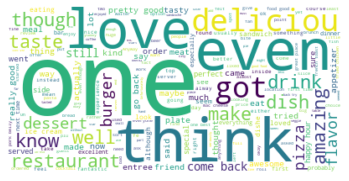

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image for genuine reviews
realReview_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(real_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(realReview_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

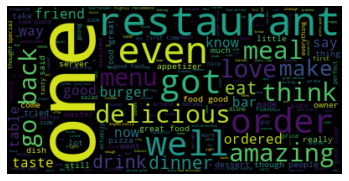

In [ ]:
# Generate a word cloud image for fake reviews
fakeReview_wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(fake_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(fakeReview_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## (2) Features Extraction



### Behavioral Features (reviewer features)
These are features related to reviewer behavior. They are calculated based on all the reviews that each user has written, not on a specific review. Therefore, to extract these features, a new dataframe will be created with each row corresponding to a particular reviewer. These features are then added to the original dataset.

Each feature will be accompanied by a description. Differences in construction and calculation between this document and the original study will also be addressed.

#### a. Review Count (RC):

The feature calculates the number of reviews that each author has posted in the dataset.

In [ ]:
#REVIEW COUNT (RC)
# find out the number of reviews written by the authors

#Create a new dataframe with reviewerID and a count column:
pd.set_option('max_colwidth', 50)
reviewerdf = df['user_id'].value_counts().to_frame('reviewCount').rename_axis('user_id').reset_index()
print(reviewerdf.head())

   user_id  reviewCount
0     8367          197
1     9501          185
2     7871          178
3     8225          159
4    10934          155


In [ ]:
reviewerdf['reviewCount'].sum()

608458

#### b. Activity Window (AW)
calculates the difference between the timestamps of the first and last reviews of an author

In [ ]:
df["date"]= pd.to_datetime(df["date"])
print(df.head())

   user_id  prod_id  rating  label       date  \
0     5044        0     1.0     -1 2014-11-16   
1     5045        0     1.0     -1 2014-09-08   
2     5046        0     3.0     -1 2013-10-06   
3     5047        0     5.0     -1 2014-11-30   
4     5048        0     5.0     -1 2014-08-28   

                                              review prod_name  
0  Drinks were bad, the hot chocolate was watered...     Toast  
1  This was the worst experience I've ever had a ...     Toast  
2  This is located on the site of the old Spruce ...     Toast  
3  I enjoyed coffee and breakfast twice at Toast ...     Toast  
4  I love Toast! The food choices are fantastic -...     Toast  


In [ ]:
#ACTIVITY WINDOW (AW)
#calculates the difference between the timestamps of the first and last reviews of an author
reviewerdf['firstDay'] = df.groupby('user_id')["date"].transform('min')
reviewerdf['lastDay'] = df.groupby('user_id')["date"].transform('max')
reviewerdf['daysInSystem'] = (reviewerdf['lastDay'] - reviewerdf['firstDay']).dt.days
print(reviewerdf.head())

   user_id  reviewCount   firstDay    lastDay  daysInSystem
0     8367          197 2014-11-16 2014-11-16             0
1     9501          185 2014-09-08 2014-09-08             0
2     7871          178 2013-10-01 2013-11-02            32
3     8225          159 2014-11-30 2014-11-30             0
4    10934          155 2014-08-28 2014-08-28             0


In [ ]:
#Adding features from reviewerdf into df
df = df.merge(reviewerdf[['user_id','reviewCount','daysInSystem']], on='user_id', how='right')

print(df.head())

   user_id  prod_id  rating  label       date  \
0     8367     3889     4.0      1 2013-01-23   
1     8367     2857     4.0      1 2011-02-23   
2     8367       46     4.0      1 2013-05-20   
3     8367       57     3.0      1 2011-01-30   
4     8367      113     3.0      1 2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem  
0          197             0  
1          197             0  
2          197             0  
3          197             0  
4          197             0  


#### c. Number of Positive Ratings (PR)

In [ ]:
# THE NUMBER OF POSITIVE REVIEWS (PR)
# approach calculates the percentage of positive reviews (reviews with 4 and 5 ratings) by an author

df['PR']=df[df['rating'] > 3].groupby('user_id')['rating'].count().reindex(df.user_id).values

print(df.head())

   user_id  prod_id  rating  label       date  \
0     8367     3889     4.0      1 2013-01-23   
1     8367     2857     4.0      1 2011-02-23   
2     8367       46     4.0      1 2013-05-20   
3     8367       57     3.0      1 2011-01-30   
4     8367      113     3.0      1 2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem     PR  
0          197             0  148.0  
1          197             0  148.0  
2          197             0  148.0  
3          197             0  148.0  
4          197             0  148.0  


#### d. Number of Negative ratings (NR)

In [ ]:
# NUMBER OF NEGATIVE RATING (NR)
df['NR']=df[df['rating'] < 3].groupby('user_id')['rating'].count().reindex(df.user_id).values
print(df.head())

   user_id  prod_id  rating  label       date  \
0     8367     3889     4.0      1 2013-01-23   
1     8367     2857     4.0      1 2011-02-23   
2     8367       46     4.0      1 2013-05-20   
3     8367       57     3.0      1 2011-01-30   
4     8367      113     3.0      1 2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem     PR    NR  
0          197             0  148.0  12.0  
1          197             0  148.0  12.0  
2          197             0  148.0  12.0  
3          197             0  148.0  12.0  
4          197  

#### e. Mean Product Rating (MPR)

In [ ]:
# MEAN PRODUCT RATING (MPR)
df['MPR']=df.groupby('prod_id')['rating'].mean().reindex(df.prod_id).values
print(df.head())

   user_id  prod_id  rating  label       date  \
0     8367     3889     4.0      1 2013-01-23   
1     8367     2857     4.0      1 2011-02-23   
2     8367       46     4.0      1 2013-05-20   
3     8367       57     3.0      1 2011-01-30   
4     8367      113     3.0      1 2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem     PR    NR       MPR  
0          197             0  148.0  12.0  3.753731  
1          197             0  148.0  12.0  3.561404  
2          197             0  148.0  12.0  4.048889  
3          197      

#### f. Order of Review (OOR)

In [ ]:
#ORDER OF REVIEW FOR A PRODUCT (OOR)
df["OOR"] = df.groupby("prod_id")["date"].rank("dense", ascending=True)
print(df.head())


   user_id  prod_id  rating  label       date  \
0     8367     3889     4.0      1 2013-01-23   
1     8367     2857     4.0      1 2011-02-23   
2     8367       46     4.0      1 2013-05-20   
3     8367       57     3.0      1 2011-01-30   
4     8367      113     3.0      1 2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem     PR    NR       MPR    RL       RCL   RD  \
0          197             0  148.0  12.0  3.753731   661  0.027231  0.0   
1          197             0  148.0  12.0  3.561404   652  0.026074  0.0   
2       

### Lingustic Features (review features)

#### a. WORD COUNT (WC)

In [ ]:
# WORD COUNT(WC)
df['WC'] = df['review'].str.split().apply(len)
print(df.head())

   user_id  prod_id  rating  label       date  \
0     8367     3889     4.0      1 2013-01-23   
1     8367     2857     4.0      1 2011-02-23   
2     8367       46     4.0      1 2013-05-20   
3     8367       57     3.0      1 2011-01-30   
4     8367      113     3.0      1 2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem     PR    NR       MPR   RL       RCL   RD  \
0          197             0  148.0  12.0  3.753731  126  0.027231  0.0   
1          197             0  148.0  12.0  3.561404  117  0.026074  0.0   
2          

#### b. The Ratio of Capital Letters (RCL)

In [ ]:
#THE RATIO OF CAPITAL LETTERS (RCL)
df['RCL'] = (df['review'].str.findall(r'[A-Z]').str.len())/df['RL']
print(df.head())

   user_id  prod_id  rating  label       date  \
0     8367     3889     4.0      1 2013-01-23   
1     8367     2857     4.0      1 2011-02-23   
2     8367       46     4.0      1 2013-05-20   
3     8367       57     3.0      1 2011-01-30   
4     8367      113     3.0      1 2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem     PR    NR       MPR    RL       RCL  
0          197             0  148.0  12.0  3.753731   661  0.027231  
1          197             0  148.0  12.0  3.561404   652  0.026074  
2          197            

#### c. The Ratio of Digits (RD)

In [ ]:
#THE RATIO OF DIGITS (RD)
df['RD'] = (df['review'].str.findall(r'[0-9]').str.len())/df['RL']
print(df.head())

   user_id  prod_id  rating  label       date  \
0     8367     3889     4.0      1 2013-01-23   
1     8367     2857     4.0      1 2011-02-23   
2     8367       46     4.0      1 2013-05-20   
3     8367       57     3.0      1 2011-01-30   
4     8367      113     3.0      1 2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem     PR    NR       MPR    RL       RCL   RD  
0          197             0  148.0  12.0  3.753731   661  0.027231  0.0  
1          197             0  148.0  12.0  3.561404   652  0.026074  0.0  
2          

#### d. Sentiment analysis features using VADERS: Compound, neg, neu, pov

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['review']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['review']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['review']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['review']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df.head()

,user_id,prod_id,rating,label,date,review,prod_name,reviewCount,daysInSystem,PR,...,MPR,RL,RCL,RD,OOR,WC,compound,neg,neu,pos
0,8367,3889,4.0,1,2013-01-23,I had a hankering for Thai and Jasmine Rice wa...,Jasmine Rice,197,0,148.0,...,3.753731,126,0.027231,0.0,54.0,126,0.9199,0.000,0.869,0.131
1,8367,2857,4.0,1,2011-02-23,Knock fills the much-needed niche of the class...,Knock,197,0,148.0,...,3.561404,117,0.026074,0.0,40.0,117,0.9647,0.033,0.765,0.201
2,8367,46,4.0,1,2013-05-20,So a pitcher of margaritas will set you back f...,Las Bugambilias,197,0,148.0,...,4.048889,106,0.018868,0.0,165.0,106,0.8858,0.000,0.896,0.104
3,8367,57,3.0,1,2011-01-30,"In all honesty, I really do like Continental M...",Continental Mid-town,197,0,148.0,...,3.606776,287,0.027177,0.0,290.0,287,0.9270,0.062,0.837,0.101
4,8367,113,3.0,1,2011-05-25,Everyone always told me how much better Vietna...,Vietnam Restaurant,197,0,148.0,...,3.742138,155,0.018980,0.0,154.0,155,0.9926,0.022,0.719,0.259


### Extract final dataset with features CSV


In [ ]:
df.to_csv('features_dataset.csv')

## (3) Extract the dataset to be used in SDLib

### Scenario 1: Original dataset, all fake review authors are labeled as fake users

#### Extracting data

In [ ]:
#Extract profiles.txt for shilling attack models:
profiles = metadata[['user_id', 'prod_id', 'rating']]
print(profiles.head())
profiles.to_csv('profiles.txt', header=None, index=None, sep=' ', mode='a')

   user_id  prod_id  rating
0     5044        0     1.0
1     5045        0     1.0
2     5046        0     3.0
3     5047        0     5.0
4     5048        0     5.0


In [ ]:
#Extract labels.txt for shilling attack models:
labels = metadata[['user_id', 'label']].drop_duplicates().sort_values(by='label', ascending=True).drop_duplicates(subset='user_id', keep="first")

#replace -1 by 1, 1 by 0:
labels.label.replace([-1, 1], [1, 0], inplace=True)
print(labels.head(), '\n')
print(labels.label.describe())

labels.to_csv('labels.txt', header=None, index=None, sep=' ', mode='a')

        user_id  label
0          5044      1
117601    26185      1
117600    13107      1
117586    83702      1
117585    83701      1 

count    260277.000000
mean          0.239084
std           0.426525
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: label, dtype: float64


#### Data exploration

Number of users in the dataset:  260277
Number of fake and real users:
label
0    198049
1     62228
dtype: int64


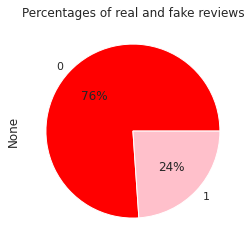

In [ ]:
#Number of users:
print("Number of users in the dataset: ", labels['user_id'].count())

#Count the users of 2 classes (Genuine/Fake)
print('Number of fake and real users:')
print(labels.groupby('label').size())

#Create pie chart
import matplotlib.pyplot as plt
labels.groupby('label').size().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],
                                title='Percentages of real and fake reviews')

Number of rating in the dataset:  608598
Number of ratings:
rating
1.0     35600
2.0     42985
3.0     83139
4.0    217465
5.0    229409
dtype: int64


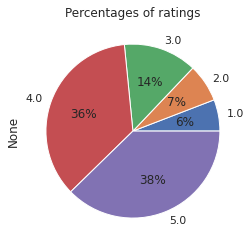

In [ ]:
#Number of ratings:
print("Number of rating in the dataset: ", profiles['rating'].count())

#Count the number of ratings
print('Number of ratings:')
print(profiles.groupby('rating').size())

#Create pie chart
import matplotlib.pyplot as plt
profiles.groupby('rating').size().plot(kind='pie', autopct='%1.0f%%',
                                title='Percentages of ratings')

In [ ]:
#Calculate rating count:
# find out the number of ratings by users

#Create a new dataframe with user_id and a count column:
pd.set_option('max_colwidth', 50)
userdf = profiles['user_id'].value_counts().to_frame('ratingCount').rename_axis('user_id').reset_index().sort_values(by='ratingCount',ascending=False)
print(userdf.head(20))

    user_id  ratingCount
0      8367          197
1      9501          185
2      7871          178
3      8225          159
4     10934          155
5      8351          142
6      7781          142
7      7777          136
8      8467          135
9      8011          133
10     9105          132
11     8337          132
12    19044          131
13    18780          127
14    13937          126
15    12874          123
16    14510          121
17    25871          118
18    14255          116
19     5095          112


In [ ]:
ratingcountdf = userdf['ratingCount'].value_counts().to_frame('countFrequent').rename_axis('ratingCount').reset_index().sort_values(by='countFrequent',ascending=False)
print(ratingcountdf.head(20))

    ratingCount  countFrequent
0             1         170098
1             2          40160
2             3          17232
3             4           8956
4             5           5792
5             6           3706
6             7           2557
7             8           1830
8             9           1491
9            10           1119
10           11            842
11           12            743
12           13            628
13           14            499
14           15            473
15           16            378
16           17            313
17           18            286
18           19            281
19           20            237


In [ ]:
#merge:
YZ1 = pd.merge(profiles, labels, on=['user_id'])
YZ1.head()

,user_id,prod_id,rating,label
0,5044,0,1.0,1
1,5045,0,1.0,1
2,5046,0,3.0,1
3,5046,376,3.0,1
4,5046,716,3.0,1


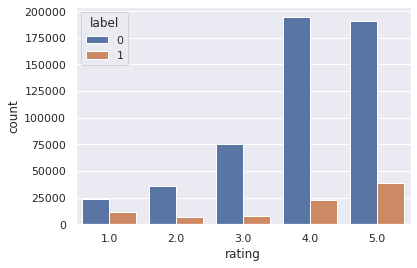

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")
YZ1_chart = sns.countplot(x="rating", hue="label", data=YZ1)

In [ ]:
#Count the number of ratings
print("Number of rating by fake users: ", YZ1[(YZ1.label == 1)]['rating'].count())
print('Number of ratings for fake users:')
print(YZ1[(YZ1.label == 1)].groupby('rating').size())

Number of rating by fake users:  87896
Number of ratings for fake users:
rating
1.0    11977
2.0     6861
3.0     7510
4.0    23125
5.0    38423
dtype: int64


In [ ]:
#Count the number of ratings
print("Number of rating by real users: ", YZ1[(YZ1.label == 0)]['rating'].count())
print('Number of ratings for real users:')
print(YZ1[(YZ1.label == 0)].groupby('rating').size())

Number of rating by real users:  520702
Number of ratings for real users:
rating
1.0     23623
2.0     36124
3.0     75629
4.0    194340
5.0    190986
dtype: int64


### Scenario 2: Remove users with less than 10 reviews

#### Extracting data

In [ ]:
#Load data:
df = pd.read_csv('features_dataset.csv')
print(df.head())

   Unnamed: 0  user_id  prod_id  rating  label        date  \
0           0     8367     3889     4.0      1  2013-01-23   
1           1     8367     2857     4.0      1  2011-02-23   
2           2     8367       46     4.0      1  2013-05-20   
3           3     8367       57     3.0      1  2011-01-30   
4           4     8367      113     3.0      1  2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem  ...       MPR   RL       RCL   RD    OOR   WC  \
0          197             0  ...  3.753731  126  0.027231  0.0   54.0  126   


In [ ]:
# Check number of reviews
df.shape[0]

608458

In [ ]:
#Remove reviews of users with less than 10 reviews
df2 = df[df['reviewCount'] >= 10]
df2.shape[0]

173448

In [ ]:
#Add 2 columns: realReviewsCount, fakeReviewsCount
df2['realReviewsCount']=df2.groupby('user_id')['label'].transform(lambda x : x.loc[x==1].count())
df2['fakeReviewsCount']=df2['reviewCount'] - df2['realReviewsCount']

#Label users: if fakeReviewsCount >= realReviewsCount: Fake user
#Fake user: 1, real user: 0
df2['userLabel'] = np.where(df2 ['fakeReviewsCount'] > 0, 1, 0)

print(df2.head())

   Unnamed: 0  user_id  prod_id  rating  label        date  \
0           0     8367     3889     4.0      1  2013-01-23   
1           1     8367     2857     4.0      1  2011-02-23   
2           2     8367       46     4.0      1  2013-05-20   
3           3     8367       57     3.0      1  2011-01-30   
4           4     8367      113     3.0      1  2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem  ...   RD    OOR   WC  compound    neg    neu  \
0          197             0  ...  0.0   54.0  126    0.9199  0.000  0.869   
1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#Create a file with labels of all users:
YZ2_labels = df2[['user_id', 'userLabel']].drop_duplicates()
YZ2_labels.to_csv('YZ2_labels.txt', header=None, index=None, sep=' ', mode='a')

In [ ]:
print("Number of reviewers in the dataset: ", YZ2_labels['user_id'].nunique())

Number of reviewers in the dataset:  8453


In [ ]:
#Create a file with all the ratings:
YZ2_profiles = df2[['user_id', 'prod_id', 'rating']]
print(YZ2_profiles.head())
YZ2_profiles.to_csv('YZ2_profiles.txt', header=None, index=None, sep=' ', mode='a')

   user_id  prod_id  rating
0     8367     3889     4.0
1     8367     2857     4.0
2     8367       46     4.0
3     8367       57     3.0
4     8367      113     3.0


#### (Dropped) Create testset with 25% fake users and 25% real users

In [ ]:
#Extract a dataframe with 2 columns: user_id and userLabel
userLabels = df2[['user_id', 'reviewCount', 'userLabel']].drop_duplicates()
print(userLabels.head())
#labels.to_csv('labels.txt', header=None, index=None, sep=' ', mode='a')

     user_id  reviewCount  userLabel
0       8367          197          0
197     9501          185          0
382     7871          178          0
560     8225          159          0
719    10934          155          0


In [ ]:
#Create test set based on user_id: 25% of fake users and 25% of real users
import random

testLabels = df2
sample_size = df.shape[0]
test_size = sample_size*0.2

fake_testdf = userLabels[userLabels['userLabel'] == 1].sample(frac=0.25, random_state=1)
real_testdf = userLabels[userLabels['userLabel'] == 0].sample(frac=0.25, random_state=1)

test_userdf = pd.concat([fake_testdf, real_testdf])

print(test_userdf.head())
print("Number of fake users in the dataset: ", test_userdf.query('userLabel == 1')['user_id'].nunique())
print("Number of real review authors in the dataset: ", test_userdf.query('userLabel == 0')['user_id'].nunique())

        user_id  reviewCount  userLabel
110245    22260           18          1
112026    14879           17          1
167098    84660           10          1
127246     9151           15          1
169518     9159           10          1
Number of fake users in the dataset:  42
Number of real review authors in the dataset:  2072


In [ ]:
#Create testset for reviews from test_userdf
test_reviews = pd.merge(df2,test_userdf[['user_id']],on='user_id')
print(test_reviews.head())

   Unnamed: 0  user_id  prod_id  rating  label        date  \
0        1158     7777        9     1.0      1  2010-09-21   
1        1159     7777       71     3.0      1  2014-04-06   
2        1160     7777      646     4.0      1  2011-09-17   
3        1161     7777      127     3.0      1  2012-02-21   
4        1162     7777      143     3.0      1  2012-05-21   

                                              review  \
0  Sorry, but everyone's right when they say they...   
1  Eight of us sat outside on a chilly day (note,...   
2  My boo would rate this terribly because his du...   
3  If you can call in, that'd be nice. Came here,...   
4  'Eh....I really expected more from this place....   

                       prod_name  reviewCount  daysInSystem  ...        RD  \
0                  Geno’s Steaks          136             0  ...  0.002174   
1                   Pig And Khao          136             0  ...  0.000000   
2                        Pio Pio          136           

In [ ]:
#Number of fake and real reviews in test_reviews
print('Number of fake and real reviews in test_reviews:')
print(test_reviews.groupby('label').size())

print('Number of fake and real reviews in df2:')
print(df2.groupby('label').size())


Number of fake and real reviews in test_reviews:
label
-1      760
 1    41615
dtype: int64
Number of fake and real reviews in df2:
label
-1      2947
 1    170501
dtype: int64


In [ ]:
#Safe test_reviews to csv:
test_reviews.to_csv('test_reviews.csv')

In [ ]:
#Extract test_profiles.txt for shilling attack models:
test_profiles = test_reviews[['user_id', 'prod_id', 'rating']]
print(test_profiles.head())
test_profiles.to_csv('test_profiles.txt', header=None, index=None, sep=' ', mode='a')

   user_id  prod_id  rating
0     7777        9     1.0
1     7777       71     3.0
2     7777      646     4.0
3     7777      127     3.0
4     7777      143     3.0


In [ ]:
#Extract test_labels.txt for shilling attack models:
test_labels = test_userdf[['user_id', 'userLabel']]

print(test_labels.head(), '\n')
test_labels.to_csv('test_labels.txt', header=None, index=None, sep=' ', mode='a')

        user_id  userLabel
110245    22260          1
112026    14879          1
167098    84660          1
127246     9151          1
169518     9159          1 



#### (Dropped) Create trainset from the rest of the dataset

In [ ]:
#Extract train_userdf:
train_userdf = userLabels[~userLabels.isin(test_userdf)].dropna()
print(train_userdf.head())

     user_id  reviewCount  userLabel
0     8367.0        197.0        0.0
197   9501.0        185.0        0.0
382   7871.0        178.0        0.0
560   8225.0        159.0        0.0
719  10934.0        155.0        0.0


In [ ]:
#Create trainset for reviews from train_userdf
train_reviews = pd.merge(df2,train_userdf[['user_id']],on='user_id')
print(train_reviews.head())

   Unnamed: 0  user_id  prod_id  rating  label        date  \
0           0     8367     3889     4.0      1  2013-01-23   
1           1     8367     2857     4.0      1  2011-02-23   
2           2     8367       46     4.0      1  2013-05-20   
3           3     8367       57     3.0      1  2011-01-30   
4           4     8367      113     3.0      1  2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem  ...   RD    OOR   WC  compound    neg    neu  \
0          197             0  ...  0.0   54.0  126    0.9199  0.000  0.869   
1 

In [ ]:
#Number of fake and real reviews in train_reviews
print('Number of fake and real reviews in train_reviews:')
print(train_reviews.groupby('label').size())

print('Number of fake and real reviews in df2:')
print(df2.groupby('label').size())


Number of fake and real reviews in train_reviews:
label
-1      2187
 1    128886
dtype: int64
Number of fake and real reviews in df2:
label
-1      2947
 1    170501
dtype: int64


In [ ]:
#Safe train_reviews to csv:
train_reviews.to_csv('train_reviews.csv')

In [ ]:
#Extract train_profiles.txt for shilling attack models:
train_profiles = train_reviews[['user_id', 'prod_id', 'rating']]
print(train_profiles.head())
train_profiles.to_csv('train_profiles.txt', header=None, index=None, sep=' ', mode='a')

   user_id  prod_id  rating
0     8367     3889     4.0
1     8367     2857     4.0
2     8367       46     4.0
3     8367       57     3.0
4     8367      113     3.0


In [ ]:
#Extract test_labels.txt for shilling attack models:
train_labels = train_userdf[['user_id', 'userLabel']]

print(train_labels.head(), '\n')
train_labels.to_csv('train_labels.txt', header=None, index=None, sep=' ', mode='a')

     user_id  userLabel
0     8367.0        0.0
197   9501.0        0.0
382   7871.0        0.0
560   8225.0        0.0
719  10934.0        0.0 



#### Data Exploration

Number of users in the dataset:  8453
Number of fake and real users:
userLabel
0    8124
1     329
dtype: int64


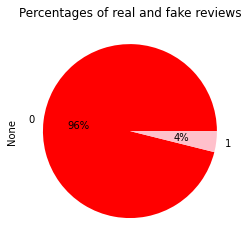

In [ ]:
#Number of users:
print("Number of users in the dataset: ", YZ2_labels['user_id'].count())

#Count the users of 2 classes (Genuine/Fake)
print('Number of fake and real users:')
print(YZ2_labels.groupby('userLabel').size())

#Create pie chart
import matplotlib.pyplot as plt
YZ2_labels.groupby('userLabel').size().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],
                                title='Percentages of real and fake reviews')

Number of rating in the dataset:  173448
Number of ratings:
rating
1.0     3870
2.0    11545
3.0    34859
4.0    76558
5.0    46616
dtype: int64


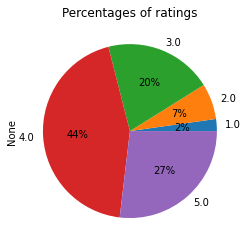

In [ ]:
#Number of ratings:
print("Number of rating in the dataset: ", YZ2_profiles['rating'].count())

#Count the number of ratings
print('Number of ratings:')
print(YZ2_profiles.groupby('rating').size())

#Create pie chart
import matplotlib.pyplot as plt
YZ2_profiles.groupby('rating').size().plot(kind='pie', autopct='%1.0f%%',
                                title='Percentages of ratings')

In [ ]:
#Calculate rating count:
# find out the number of ratings by users

#Create a new dataframe with user_id and a count column:
pd.set_option('max_colwidth', 50)
userdf2 = YZ2_profiles['user_id'].value_counts().to_frame('ratingCount').rename_axis('user_id').reset_index().sort_values(by='ratingCount',ascending=False)
print(userdf2.head(20))

    user_id  ratingCount
0      8367          197
1      9501          185
2      7871          178
3      8225          159
4     10934          155
5      8351          142
6      7781          142
7      7777          136
8      8467          135
9      8011          133
10     9105          132
11     8337          132
12    19044          131
13    18780          127
14    13937          126
15    12874          123
16    14510          121
17    25871          118
18    14255          116
19     5095          112


In [ ]:
ratingcountdf2 = userdf2['ratingCount'].value_counts().to_frame('countFrequent').rename_axis('ratingCount').reset_index().sort_values(by='countFrequent',ascending=False)
print(ratingcountdf2.head(20))

    ratingCount  countFrequent
0            10           1120
1            11            839
2            12            746
3            13            625
4            14            499
5            15            475
6            16            378
7            17            312
8            18            286
9            19            280
10           20            238
11           21            194
12           23            179
13           22            177
14           24            156
16           26            146
15           25            146
17           27            112
18           28            102
19           29             96


In [ ]:
#merge:
YZ2 = pd.merge(YZ2_profiles, YZ2_labels, on=['user_id'])
YZ2.head()

,user_id,prod_id,rating,userLabel
0,8367,3889,4.0,0
1,8367,2857,4.0,0
2,8367,46,4.0,0
3,8367,57,3.0,0
4,8367,113,3.0,0


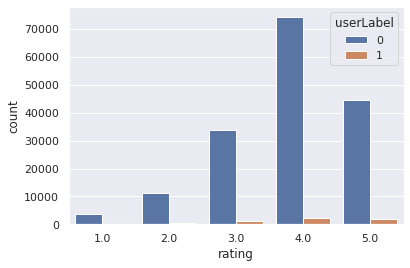

In [ ]:
YZ2_chart = sns.countplot(x="rating", hue="userLabel", data=YZ2)

In [ ]:
#Count the number of ratings
print("Number of rating by fake users: ", YZ2[(YZ2.userLabel == 1)]['rating'].count())
print('Number of ratings for fake users:')
print(YZ2[(YZ2.userLabel == 1)].groupby('rating').size())

Number of rating by fake users:  6041
Number of ratings for fake users:
rating
1.0     241
2.0     415
3.0    1029
4.0    2279
5.0    2077
dtype: int64


In [ ]:
#Count the number of ratings
print("Number of rating by real users: ", YZ2[(YZ2.userLabel == 0)]['rating'].count())
print('Number of ratings for real users:')
print(YZ2[(YZ2.userLabel == 0)].groupby('rating').size())

Number of rating by real users:  167407
Number of ratings for real users:
rating
1.0     3629
2.0    11130
3.0    33830
4.0    74279
5.0    44539
dtype: int64


### Scenario 3: Remove some genuine users randomly

#### Extracting data

In [ ]:
YZ3_labels=YZ2_labels.drop(YZ2_labels.query('userLabel == 0').sample(frac=.84).index)


Number of users in the dataset:  1629
Number of fake and real users:
userLabel
0    1300
1     329
dtype: int64


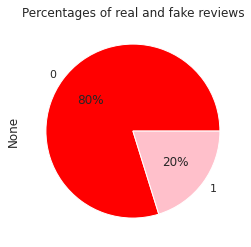

In [ ]:
#Number of users:
print("Number of users in the dataset: ", YZ3_labels['user_id'].count())

#Count the users of 2 classes (Genuine/Fake)
print('Number of fake and real users:')
print(YZ3_labels.groupby('userLabel').size())

#Create pie chart
import matplotlib.pyplot as plt
YZ3_labels.groupby('userLabel').size().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],
                                title='Percentages of real and fake reviews')

In [ ]:
YZ3_profiles = pd.merge(YZ2_profiles,YZ3_labels[['user_id']],on='user_id')

Number of rating in the dataset:  33682
Number of ratings:
rating
1.0      841
2.0     2240
3.0     6673
4.0    14714
5.0     9214
dtype: int64


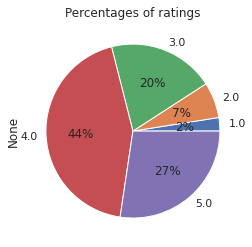

In [ ]:
#Number of ratings:
print("Number of rating in the dataset: ", YZ3_profiles['rating'].count())

#Count the number of ratings
print('Number of ratings:')
print(YZ3_profiles.groupby('rating').size())

#Create pie chart
import matplotlib.pyplot as plt
YZ3_profiles.groupby('rating').size().plot(kind='pie', autopct='%1.0f%%',
                                title='Percentages of ratings')

In [ ]:
#Write to txt files
YZ3_labels.to_csv('YZ3_labels.txt', header=None, index=None, sep=' ', mode='a')
YZ3_profiles.to_csv('YZ3_profiles.txt', header=None, index=None, sep=' ', mode='a')

#### Data Exploration

In [ ]:
#Calculate rating count:
# find out the number of ratings by users

#Create a new dataframe with user_id and a count column:
pd.set_option('max_colwidth', 50)
userdf3 = YZ3_profiles['user_id'].value_counts().to_frame('ratingCount').rename_axis('user_id').reset_index().sort_values(by='ratingCount',ascending=False)
print(userdf3.head(20))

    user_id  ratingCount
0      7777          136
1      9105          132
2     13937          126
3     14255          116
4      9679          109
5     17116          109
6      6901           99
7     10252           97
8     10339           97
9      8572           95
10     9102           91
11     5577           89
12    13718           88
13     5527           87
14     7848           82
15    10119           81
16     5612           80
17    10640           80
18     8226           79
19     7035           78


In [ ]:
ratingcountdf3 = userdf3['ratingCount'].value_counts().to_frame('countFrequent').rename_axis('ratingCount').reset_index().sort_values(by='countFrequent',ascending=False)
print(ratingcountdf3.head(20))

    ratingCount  countFrequent
0            10            233
1            11            186
2            12            145
3            13            100
4            15             90
5            14             86
6            17             63
7            16             63
8            18             61
9            21             45
10           20             44
11           19             42
12           23             33
13           26             32
14           24             26
15           29             25
16           25             24
17           28             21
18           22             21
19           27             19


In [ ]:
YZ3 = pd.merge(YZ3_profiles, YZ3_labels, on=['user_id'])
YZ3.head()

,user_id,prod_id,rating,userLabel
0,7777,9,1.0,0
1,7777,71,3.0,0
2,7777,646,4.0,0
3,7777,127,3.0,0
4,7777,143,3.0,0


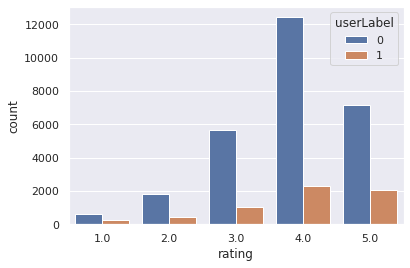

In [ ]:
YZ3_chart = sns.countplot(x="rating", hue="userLabel", data=YZ3)

In [ ]:
#Count the number of ratings
print("Number of rating by fake users: ", YZ3[(YZ3.userLabel == 1)]['rating'].count())
print('Number of ratings for fake users:')
print(YZ3[(YZ3.userLabel == 1)].groupby('rating').size())

Number of rating by fake users:  6041
Number of ratings for fake users:
rating
1.0     241
2.0     415
3.0    1029
4.0    2279
5.0    2077
dtype: int64


In [ ]:
#Count the number of ratings
print("Number of rating by real users: ", YZ3[(YZ3.userLabel == 0)]['rating'].count())
print('Number of ratings for real users:')
print(YZ3[(YZ3.userLabel == 0)].groupby('rating').size())

Number of rating by real users:  27641
Number of ratings for real users:
rating
1.0      600
2.0     1825
3.0     5644
4.0    12435
5.0     7137
dtype: int64


### Scenario 4: >=10 reviews, 35% fake users

In [ ]:
#Remove reviews of users with less than 5 reviews
df3 = df[df['reviewCount'] >= 10]
df3.shape[0]

173448

In [ ]:
df3['realReviewsCount']=df3.groupby('user_id')['label'].transform(lambda x : x.loc[x==1].count())
df3['fakeReviewsCount']=df3['reviewCount'] - df3['realReviewsCount']

#Label users: if fakeReviewsCount >= realReviewsCount: Fake user
#Fake user: 1, real user: 0
df3['userLabel'] = np.where(df3 ['fakeReviewsCount'] > 0, 1, 0)

print(df3.head())

   Unnamed: 0  user_id  prod_id  rating  label        date  \
0           0     8367     3889     4.0      1  2013-01-23   
1           1     8367     2857     4.0      1  2011-02-23   
2           2     8367       46     4.0      1  2013-05-20   
3           3     8367       57     3.0      1  2011-01-30   
4           4     8367      113     3.0      1  2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem  ...   RD    OOR   WC  compound    neg    neu  \
0          197             0  ...  0.0   54.0  126    0.9199  0.000  0.869   
1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#Create a file with labels of all users:
YZ4a_labels = df3[['user_id', 'userLabel']].drop_duplicates()
YZ4a_profiles = df3[['user_id', 'prod_id', 'rating']]

In [ ]:
YZ4_labels=YZ4a_labels.drop(YZ4a_labels.query('userLabel == 0').sample(frac=.925).index)

Number of users in the dataset:  938
Number of fake and real users:
userLabel
0    609
1    329
dtype: int64


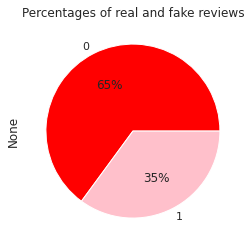

In [ ]:
#Number of users:
print("Number of users in the dataset: ", YZ4_labels['user_id'].count())

#Count the users of 2 classes (Genuine/Fake)
print('Number of fake and real users:')
print(YZ4_labels.groupby('userLabel').size())

#Create pie chart
import matplotlib.pyplot as plt
YZ4_labels.groupby('userLabel').size().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],
                                title='Percentages of real and fake reviews')

In [ ]:
YZ4_profiles = pd.merge(YZ4a_profiles,YZ4_labels[['user_id']],on='user_id')

Number of rating in the dataset:  18533
Number of ratings:
rating
1.0     508
2.0    1240
3.0    3600
4.0    7883
5.0    5302
dtype: int64


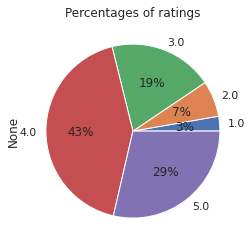

In [ ]:
#Number of ratings:
print("Number of rating in the dataset: ", YZ4_profiles['rating'].count())

#Count the number of ratings
print('Number of ratings:')
print(YZ4_profiles.groupby('rating').size())

#Create pie chart
import matplotlib.pyplot as plt
YZ4_profiles.groupby('rating').size().plot(kind='pie', autopct='%1.0f%%',
                                title='Percentages of ratings')

In [ ]:
#Write to txt files
YZ4_labels.to_csv('YZ4_labels.txt', header=None, index=None, sep=' ', mode='a')
YZ4_profiles.to_csv('YZ4_profiles.txt', header=None, index=None, sep=' ', mode='a')

In [ ]:
#Calculate rating count:
# find out the number of ratings by users

#Create a new dataframe with user_id and a count column:
pd.set_option('max_colwidth', 50)
userdf4 = YZ4_profiles['user_id'].value_counts().to_frame('ratingCount').rename_axis('user_id').reset_index().sort_values(by='ratingCount',ascending=False)
print(userdf4.head(20))

    user_id  ratingCount
0      7777          136
1      8011          133
2      9105          132
3     13937          126
4     14255          116
5      7087          102
6     13850           96
7      7315           87
8     13604           82
9      8226           79
10    15855           73
11    16818           72
12    15663           72
13    24640           70
16    12241           65
15    13875           65
14    13847           65
17     5671           63
18     8997           63
19    12533           62


In [ ]:
ratingcountdf4 = userdf4['ratingCount'].value_counts().to_frame('countFrequent').rename_axis('ratingCount').reset_index().sort_values(by='countFrequent',ascending=False)
print(ratingcountdf4.head(20))

    ratingCount  countFrequent
0            10            136
1            11            112
2            12             84
3            13             76
4            15             57
5            14             49
6            16             37
7            18             33
8            17             31
9            19             25
10           23             21
11           30             20
12           20             18
13           22             17
15           21             16
14           24             16
17           28             14
18           25             14
16           26             14
19           27             13


In [ ]:
YZ4 = pd.merge(YZ4_profiles, YZ4_labels, on=['user_id'])
YZ4.head()

,user_id,prod_id,rating,userLabel
0,7777,9,1.0,0
1,7777,71,3.0,0
2,7777,646,4.0,0
3,7777,127,3.0,0
4,7777,143,3.0,0


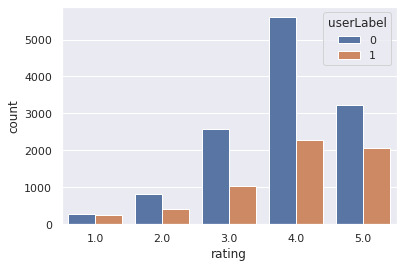

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")

YZ4_chart = sns.countplot(x="rating", hue="userLabel", data=YZ4)

In [ ]:
#Count the number of ratings
print("Number of rating by fake users: ", YZ4[(YZ4.userLabel == 1)]['rating'].count())
print('Number of ratings for fake users:')
print(YZ4[(YZ4.userLabel == 1)].groupby('rating').size())

Number of rating by fake users:  6041
Number of ratings for fake users:
rating
1.0     241
2.0     415
3.0    1029
4.0    2279
5.0    2077
dtype: int64


In [ ]:
#Count the number of ratings
print("Number of rating by real users: ", YZ4[(YZ4.userLabel == 0)]['rating'].count())
print('Number of ratings for real users:')
print(YZ4[(YZ4.userLabel == 0)].groupby('rating').size())

Number of rating by real users:  12492
Number of ratings for real users:
rating
1.0     267
2.0     825
3.0    2571
4.0    5604
5.0    3225
dtype: int64


## (4) Prediction Model

### Pre-processing

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load data:
df = pd.read_csv('features_dataset.csv')
print(df.head())

   Unnamed: 0  user_id  prod_id  rating  label        date  \
0           0     8367     3889     4.0      1  2013-01-23   
1           1     8367     2857     4.0      1  2011-02-23   
2           2     8367       46     4.0      1  2013-05-20   
3           3     8367       57     3.0      1  2011-01-30   
4           4     8367      113     3.0      1  2011-05-25   

                                              review             prod_name  \
0  I had a hankering for Thai and Jasmine Rice wa...          Jasmine Rice   
1  Knock fills the much-needed niche of the class...                 Knock   
2  So a pitcher of margaritas will set you back f...       Las Bugambilias   
3  In all honesty, I really do like Continental M...  Continental Mid-town   
4  Everyone always told me how much better Vietna...    Vietnam Restaurant   

   reviewCount  daysInSystem  ...       MPR   RL       RCL   RD    OOR   WC  \
0          197             0  ...  3.753731  126  0.027231  0.0   54.0  126   


In [ ]:
#Count number of missing values:
print(" \nTotal NaN at each column: \n", df.isnull().sum())

 
Total NaN at each column: 
 Unnamed: 0           0
user_id              0
prod_id              0
rating               0
label                0
date                 0
review               0
prod_name            0
reviewCount          0
daysInSystem         0
PR               53242
NR              357633
MPR                  0
RL                   0
RCL                  0
RD                   0
OOR                  0
WC                   0
compound             0
neg                  0
neu                  0
pos                  0
dtype: int64


In [ ]:
#Replace missing data by 0
df['PR'] = df['PR'].fillna(0)
df['NR'] = df['NR'].fillna(0)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler

#Separate features and target values
#df.set_index(["reviewCount","daysInSystem"])
#Separate features and target values
#df.set_index(["reviewCount","daysInSystem"])
features = df[["reviewCount","daysInSystem", "rating", "MPR", "PR", "NR", "RL", "RCL", "RD", "OOR", "WC", "compound", "neg", "neu", "pos"]]
labels = df["label"]

In [ ]:
print(features.shape)
print(labels.shape)

(608458, 15)
(608458,)


In [ ]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                    test_size=0.25, random_state=123)

In [ ]:
#Normalize to 0-1 range using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#Apply normalization on the training set using StandardScaler:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
#Handling unbalanced data using Over-sampling:
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target X_ros, y_ros = ros.fit_resample(X_train_norm, y_train)

X_resampled, y_resampled = ros.fit_resample(X_train_norm, y_train)

print('shape before oversampling', y_train.shape)
print('shape after oversampling', y_resampled.shape)

shape before oversampling (456343,)
shape after oversampling (792166,)


### MLP


hidden_layer_size =  100
activation =  relu
learning_Rate_init =  0.002
Accuracy = 0.7040528547480525
Confusion Matrix: 
 [[15844  4335]
 [40683 91253]]
Sensitivity:  0.785172704296546
Specificity:  0.6916459495512975
AUC:  0.7384093269239217


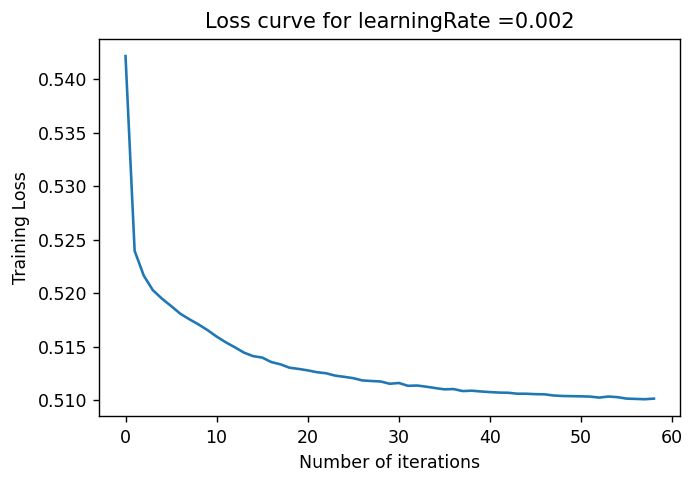

In [ ]:
#Create an experiment with different parameters:
hidden_layer = [100]
activ = ['relu']
learning_rate= [0.002]

#Create a for loop for the experiment:
for hd in hidden_layer:
    for act in activ:
        for lr in learning_rate:
            #Print the parameters:
            print('\nhidden_layer_size = ', hd)
            print('activation = ', act)
            print('learning_Rate_init = ', lr)
            
            # Initialise the algorithm
            mlp = MLPClassifier(hidden_layer_sizes=hd, 
                                activation=act, learning_rate_init=lr)
            mlp.fit(X_resampled, y_resampled) # Train the algorithm
            predictions = mlp.predict(X_test_norm) # Make predictions
            
            cm = confusion_matrix(y_test, predictions)
            
            #Print the results:
            #print('Cost = ', cost)
            print("Accuracy =", accuracy_score(y_test, predictions))
            print("Confusion Matrix: \n", cm)
            print("Sensitivity: ", cm[0,0]/(cm[0,0]+cm[0,1]))
            print("Specificity: ", cm[1,1]/(cm[1,0]+cm[1,1]))
            print("AUC: ", roc_auc_score(y_test, predictions))

            """
            Plotting the loss curve
            """
            lossPerIteration = mlp.loss_curve_
            plt.figure(dpi=125)
            plt.plot(lossPerIteration)
            plt.title("Loss curve for learningRate ="+ str(lr))
            plt.xlabel("Number of iterations")
            plt.ylabel("Training Loss")
            plt.show()

### RandomForest Classifier

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets
clf.fit(X_resampled,y_resampled)

y_pred=clf.predict(X_test_norm)

In [ ]:

#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
            
#Print the results:
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", cm)
print("Sensitivity: ", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity: ", cm[1,1]/(cm[1,0]+cm[1,1]))
print("AUC: ", roc_auc_score(y_test, y_pred))

Accuracy = 0.8602636163428985
Confusion Matrix: 
 [[  4896  15283]
 [  5973 125963]]
Sensitivity:  0.2426284751474305
Specificity:  0.9547280499636187
AUC:  0.5986782625555246


### Decision Tree

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_resampled,y_resampled)

#Predict the response for test dataset
y_pred = clf.predict(X_test_norm)

In [ ]:
#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

# Get the results:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", cm)
print("Sensitivity: ", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity: ", cm[1,1]/(cm[1,0]+cm[1,1]))
print("AUC: ", roc_auc_score(y_test, y_pred))

Accuracy: 0.8109325181606022
Confusion Matrix: 
 [[  5582  14597]
 [ 14163 117773]]
Sensitivity:  0.27662421329104514
Specificity:  0.8926524981809362
AUC:  0.5846383557359907


### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_resampled,y_resampled)

#Predict the response for test dataset
y_pred = lr.predict(X_test_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

# Get the results:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", cm)
print("Sensitivity: ", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity: ", cm[1,1]/(cm[1,0]+cm[1,1]))
print("AUC: ", roc_auc_score(y_test, y_pred))

Accuracy: 0.610281694770404
Confusion Matrix: 
 [[17302  2877]
 [56405 75531]]
Sensitivity:  0.8574260369691263
Specificity:  0.5724821125394131
AUC:  0.7149540747542698


###  Multinomial Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
mnb = MultinomialNB().fit(X_resampled,y_resampled)
#Predict the response for test dataset
y_pred = mnb.predict(X_test_norm)

In [ ]:
#Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)

# Get the results:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", cm)
print("Sensitivity: ", cm[0,0]/(cm[0,0]+cm[0,1]))
print("Specificity: ", cm[1,1]/(cm[1,0]+cm[1,1]))
print("AUC: ", roc_auc_score(y_test, y_pred))

Accuracy: 0.5148013016467804
Confusion Matrix: 
 [[18457  1722]
 [72084 59852]]
Sensitivity:  0.9146637593537836
Specificity:  0.4536441911229687
AUC:  0.6841539752383762
